## 6.5. Unsupervised machine learning - clustering

## Table of contents:
### 1. Import libraries and dataset
### 2. Data reprocessing
### 3. Apply elbow technique to normalized data
### 4. k-means clustering
### 5. Descriptive statistics for clusters
### 6. Concatenate original and normalized dataframes
##

### 1. Import libraries and dataset

In [71]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl
from sklearn import preprocessing
%matplotlib inline

In [72]:
# Create path
path = r'C:\Users\marta\OneDrive\Documents\A6 Personal Project'

In [73]:
# Import dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'emissions_macro_indicators_final.csv'))

In [74]:
# Check the output
df.head()

,Unnamed: 0,country,year,country_code,temp_change,total_population,population_category,total_emissions,emissions_CO2,emissions_N2O,emissions_CH4,agric_export,agric_import,gdp,agric_gross_prod_value
0,0,Afghanistan,2002,4,1.365,21000.256,Low population,695.719823,650.760809,0.524767,44.434247,35964.0,303167.0,4141.523943,3403032.0
1,1,Afghanistan,2003,4,0.587,22645.130,Low population,713.515557,662.122718,0.556194,50.836645,58782.0,451001.0,4729.042179,3403032.0
2,2,Afghanistan,2004,4,1.373,23553.551,Low population,704.272007,652.141129,0.494035,51.636843,64919.0,500790.0,5388.482107,3403032.0
3,3,Afghanistan,2005,4,0.401,24411.191,Low population,737.718469,679.839519,0.498897,57.380053,78944.0,743294.0,6220.574147,3403032.0
4,4,Afghanistan,2006,4,1.720,25442.944,Low population,771.563510,708.516693,0.512822,62.533995,79550.0,806212.0,7104.711445,3403032.0


In [75]:
# Drop Unnamed: 0 column
df = df.drop('Unnamed: 0', axis = 1)

In [76]:
# Check dimensions
df.shape

(3755, 14)

In [77]:
# Check the output
df.head()

,country,year,country_code,temp_change,total_population,population_category,total_emissions,emissions_CO2,emissions_N2O,emissions_CH4,agric_export,agric_import,gdp,agric_gross_prod_value
0,Afghanistan,2002,4,1.365,21000.256,Low population,695.719823,650.760809,0.524767,44.434247,35964.0,303167.0,4141.523943,3403032.0
1,Afghanistan,2003,4,0.587,22645.130,Low population,713.515557,662.122718,0.556194,50.836645,58782.0,451001.0,4729.042179,3403032.0
2,Afghanistan,2004,4,1.373,23553.551,Low population,704.272007,652.141129,0.494035,51.636843,64919.0,500790.0,5388.482107,3403032.0
3,Afghanistan,2005,4,0.401,24411.191,Low population,737.718469,679.839519,0.498897,57.380053,78944.0,743294.0,6220.574147,3403032.0
4,Afghanistan,2006,4,1.720,25442.944,Low population,771.563510,708.516693,0.512822,62.533995,79550.0,806212.0,7104.711445,3403032.0


### 2. Data reprocessing

In [78]:
# Create a subset dataframe excluding categorical variables
df_subset = df.filter(['temp_change', 'total_population', 'total_emissions', 'agric_export', 'agric_import', 'gdp',
                       'agric_gross_prod_value'], axis = 1)

In [79]:
# Check the result
df_subset

,temp_change,total_population,total_emissions,agric_export,agric_import,gdp,agric_gross_prod_value
0,1.365,21000.256,695.719823,35964.00,303167.00,4141.523943,3403032.0
1,0.587,22645.130,713.515557,58782.00,451001.00,4729.042179,3403032.0
2,1.373,23553.551,704.272007,64919.00,500790.00,5388.482107,3403032.0
3,0.401,24411.191,737.718469,78944.00,743294.00,6220.574147,3403032.0
4,1.720,25442.944,771.563510,79550.00,806212.00,7104.711445,3403032.0
...,...,...,...,...,...,...,...
3750,0.088,14751.101,1441.517095,1023487.32,724906.11,22040.654699,3624101.0
3751,0.453,15052.184,1546.827784,1143496.85,730995.11,23645.265549,1603258.0
3752,0.925,15354.608,1536.775703,1068187.47,388213.89,22594.520375,3403032.0
3753,0.389,15669.666,1384.372886,1032778.81,985028.75,21664.745864,3403032.0


In [80]:
# Standardize the data
# RobustScaler() is better option for data with true outliers (which is the case here)
scaler = preprocessing.RobustScaler()
df_normalized = scaler.fit_transform(df_subset)
df_normalized = pd.DataFrame(df_normalized, columns =['temp_change', 'total_population', 'total_emissions', 'agric_export',
                                              'agric_import', 'gdp', 'agric_gross_prod_value'])

In [81]:
# Check the result
df_normalized.head()

,temp_change,total_population,total_emissions,agric_export,agric_import,gdp,agric_gross_prod_value
0,0.505660,0.549007,-0.138639,-0.166094,-0.192172,-0.123540,0.0
1,-0.668679,0.617998,-0.136273,-0.159350,-0.157808,-0.120023,0.0
2,0.517736,0.656100,-0.137502,-0.157536,-0.146235,-0.116076,0.0
3,-0.949434,0.692073,-0.133055,-0.153390,-0.089864,-0.111095,0.0
4,1.041509,0.735348,-0.128555,-0.153211,-0.075239,-0.105803,0.0


In [82]:
# Check descriptive statistics for standardized data
df_normalized.describe()

,temp_change,total_population,total_emissions,agric_export,agric_import,gdp,agric_gross_prod_value
count,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000,3755.000000
mean,0.090329,1.245083,1.989409,1.574307,1.157303,2.003610,2.153746
std,0.789719,5.853222,9.376715,4.554887,3.495075,9.023408,12.995228
min,-2.316981,-0.331409,-0.212092,-0.176724,-0.262068,-0.148237,-0.518916
25%,-0.449057,-0.245289,-0.145750,-0.155280,-0.183407,-0.106369,-0.326831
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.550943,0.754711,0.854250,0.844720,0.816593,0.893631,0.673169
max,4.016604,59.474823,135.957809,51.164139,47.320870,139.409053,244.349792


### 3. Apply elbow technique to normalized data

In [83]:
# Define the range of potential clusters and k-means clusters in the range
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [84]:
# Create a score to show a rate of variation for given cluster option
score = [kmeans[i].fit(df_normalized).score(df_normalized) for i in range(len(kmeans))] 
score

C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1524375.5993142016,
 -630841.5814806622,
 -378694.82096593187,
 -259562.57473646654,
 -159973.93659383856,
 -126359.35578382872,
 -106000.16218600636,
 -96052.34537495516,
 -86533.11371533074]

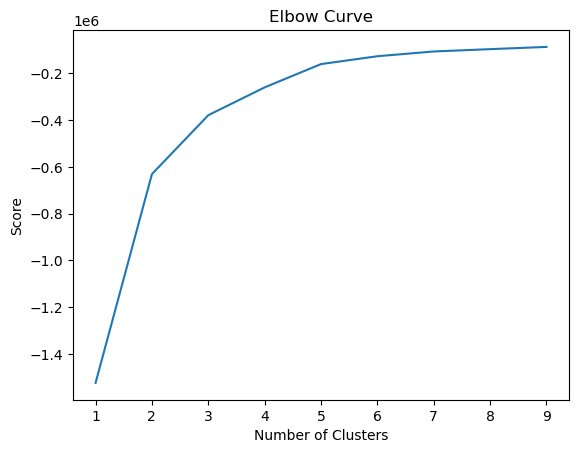

In [85]:
# Plot the elbow curve using PyLab
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

According to the elbow curve, the maximum number of clusters for the data can be 5. I decided to pick 3 clusters, as the difference in scores is less noticable once the number of clusters is above 3.

### 4. k-means clustering

In [86]:
# Create the k-means object
kmeans = KMeans(n_clusters = 3) 

In [87]:
# Fit the k-means object to the data
kmeans.fit(df_normalized)

C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [88]:
# Perform clustering using the k-means model and assign the results to new 'clusters' column
df_normalized['clusters'] = kmeans.fit_predict(df_normalized)

C:\Users\marta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
# Check the result
df_normalized.head()

,temp_change,total_population,total_emissions,agric_export,agric_import,gdp,agric_gross_prod_value,clusters
0,0.505660,0.549007,-0.138639,-0.166094,-0.192172,-0.123540,0.0,0
1,-0.668679,0.617998,-0.136273,-0.159350,-0.157808,-0.120023,0.0,0
2,0.517736,0.656100,-0.137502,-0.157536,-0.146235,-0.116076,0.0,0
3,-0.949434,0.692073,-0.133055,-0.153390,-0.089864,-0.111095,0.0,0
4,1.041509,0.735348,-0.128555,-0.153211,-0.075239,-0.105803,0.0,0


In [90]:
# Count number of values within each cluster
df_normalized['clusters'].value_counts()

clusters
0    3703
2      38
1      14
Name: count, dtype: int64

#### -- Scatterplots

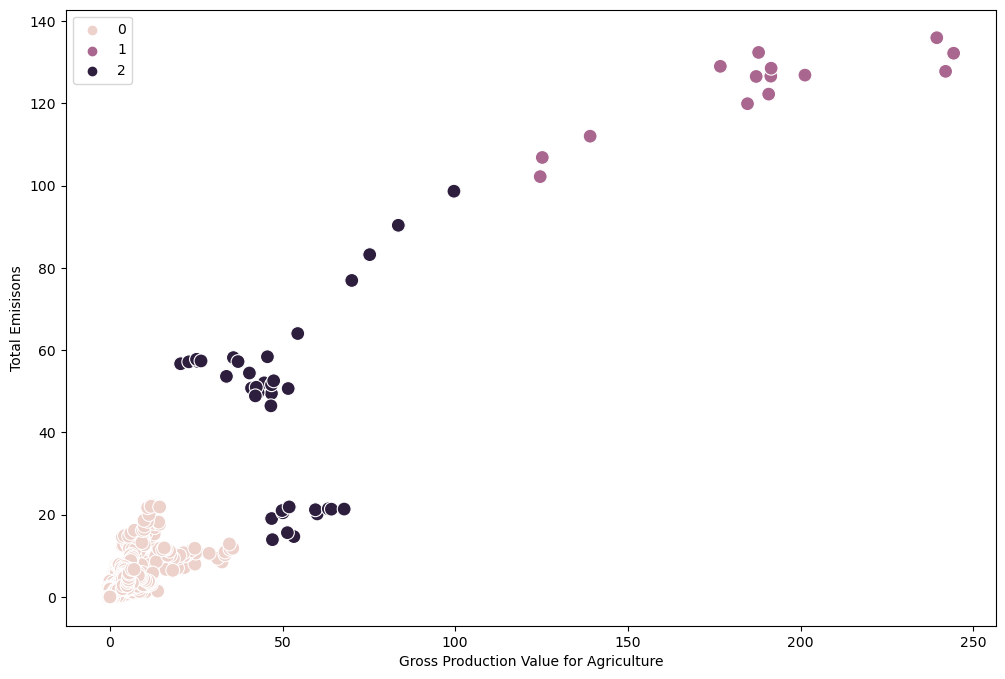

In [91]:
# Plot the clusters for the "agric_gross_prod_value" and "total_emissions" variables
plt.figure(figsize=(12,8))
plt_1 = sns.scatterplot(x=df_normalized['agric_gross_prod_value'], y=df_normalized['total_emissions'], hue=kmeans.labels_, s=100) 

plt_1.grid(False)
plt.xlabel('Gross Production Value for Agriculture') 
plt.ylabel('Total Emisisons') 
plt.show()

In [92]:
# Export scatterplot
plt_1.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_cluster_1.png'),bbox_inches='tight')

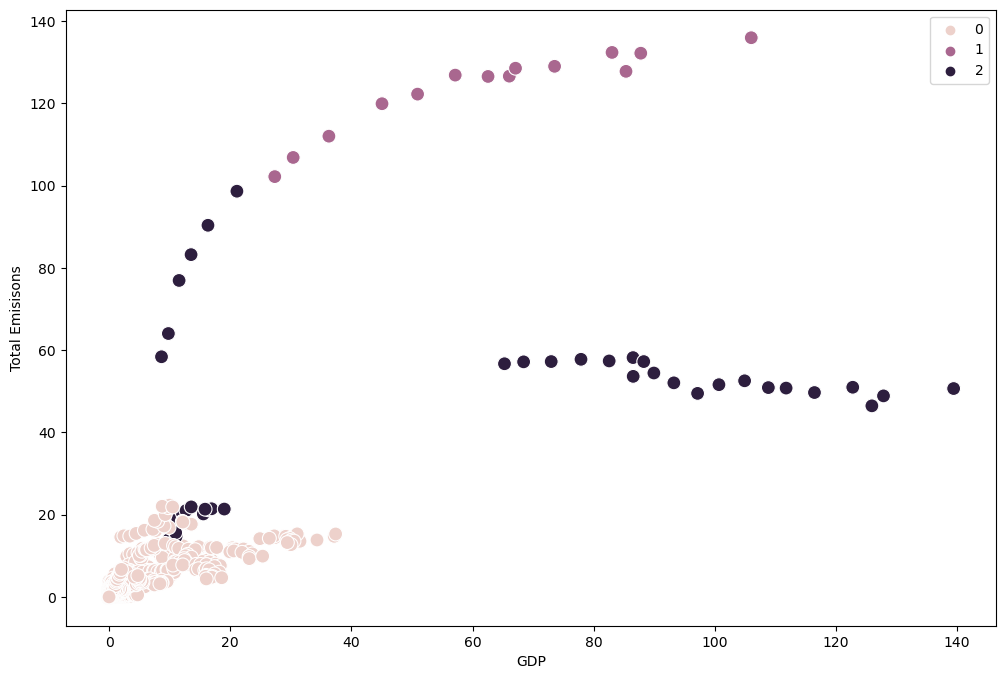

In [93]:
# Plot the clusters for the "gdp" and "total_emissions" variables
plt.figure(figsize=(12,8))
plt_2 = sns.scatterplot(x=df_normalized['gdp'], y=df_normalized['total_emissions'], hue=kmeans.labels_, s=100) 

plt_2.grid(False)
plt.xlabel('GDP') 
plt.ylabel('Total Emisisons') 
plt.show()

In [94]:
# Export scatterplot
plt_2.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_cluster_2.png'),bbox_inches='tight')

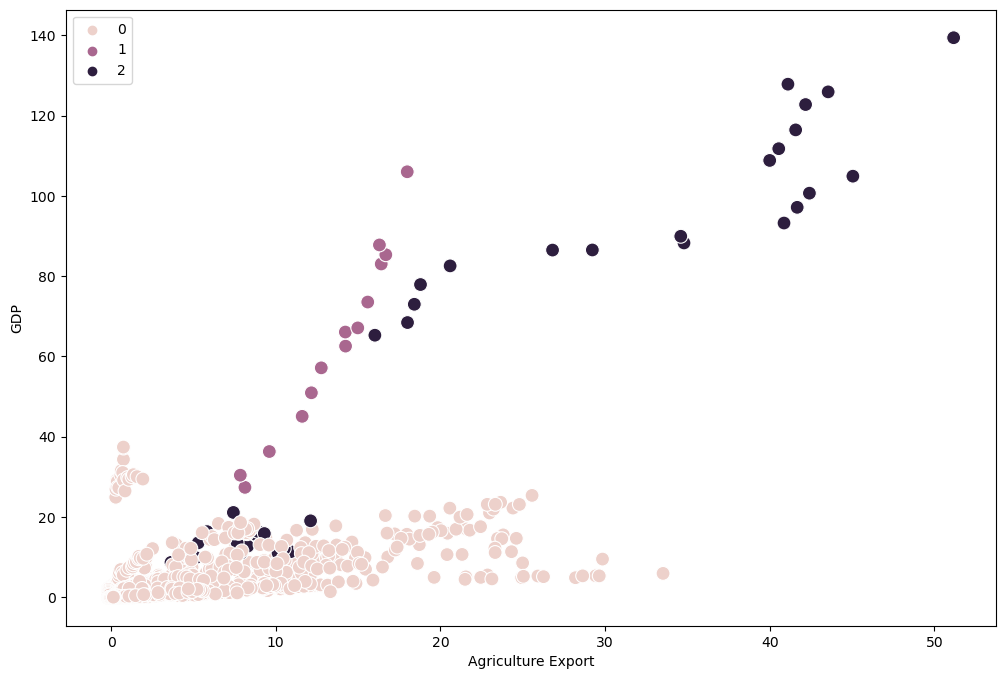

In [95]:
# Plot the clusters for the "agric_export" and "gdp" variables
plt.figure(figsize=(12,8))
plt_3 = sns.scatterplot(x=df_normalized['agric_export'], y=df_normalized['gdp'], hue=kmeans.labels_, s=100) 

plt_3.grid(False)
plt.xlabel('Agriculture Export') 
plt.ylabel('GDP') 
plt.show()

In [96]:
# Export scatterplot
plt_3.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'scatter_cluster_3.png'),bbox_inches='tight')

### 5. Descriptive statistics for clusters

In [97]:
# Add descriptive names for clusters in a new column
df_normalized.loc[df_normalized['clusters'] == 2, 'cluster'] = 'dark purple'
df_normalized.loc[df_normalized['clusters'] == 1, 'cluster'] = 'purple'
df_normalized.loc[df_normalized['clusters'] == 0, 'cluster'] = 'pink'

In [98]:
# Check the result
df_normalized.head(3)

,temp_change,total_population,total_emissions,agric_export,agric_import,gdp,agric_gross_prod_value,clusters,cluster
0,0.505660,0.549007,-0.138639,-0.166094,-0.192172,-0.123540,0.0,0,pink
1,-0.668679,0.617998,-0.136273,-0.159350,-0.157808,-0.120023,0.0,0,pink
2,0.517736,0.656100,-0.137502,-0.157536,-0.146235,-0.116076,0.0,0,pink


In [99]:
# Descriptive statistics for three cluster groups
df_normalized.groupby('cluster').agg({'temp_change':['mean', 'median'], 
                         'total_population':['mean', 'median'], 
                         'total_emissions':['mean', 'median'],
                         'agric_export':['mean', 'median'],
                         'agric_import':['mean', 'median'], 
                         'gdp':['mean', 'median'],
                         'agric_gross_prod_value':['mean', 'median']})

temp_change           total_population            total_emissions  \
                   mean    median             mean     median            mean   
cluster                                                                         
dark purple   -0.122145 -0.078491        32.825503  13.780832       46.498971   
pink           0.091702 -0.001509         0.707250  -0.011587        1.073232   
purple         0.304043  0.419623        57.783789  57.946372      123.506541   

                        agric_export            agric_import             \
                 median         mean     median         mean     median   
cluster                                                                   
dark purple   50.925781    21.747454  17.010361    14.683241  11.062796   
pink          -0.006197     1.322334  -0.005910     0.925595  -0.011166   
purple       126.740711    13.465277  14.231898    25.730751  25.874353   

                   gdp            agric_gross_prod_value              
                  mean     median                   mean      median  
cluster                                                               
dark purple  58.248691  66.848433              48.815351   46.811361  
pink          1.196757  -0.000314               0.973854    0.000000  
purple       62.750895  64.309397             187.582304  189.325507

#### Insights:
- dark purple: has medium level of population, total emissions, import, and gross product values for agriculture. This cluster has the highest export and gdp values.<br><br>
- pink cluster: has medium level of temperature change, while average values for other variables are the lowest compared to dark purple and purple clusters;<br><br>
- purple cluster: is the one with the highest temperature changes, population, and emissions. Import values and agriculture gross production values are also the highest compared to the other groups. Other macroeconomic indicators for agriculture sector are at the medium level;<br><br>
These findings confirm that variables vary across three clusters. For future analysis I might divide countires into tree groups and then look into each group separately. 


### 6. Concatenate original and normalized dataframes

In [100]:
# Rename columns in normalized dataframe
df_normalized.rename(columns = {'temp_change' : 'temp_change_norm', 'total_population' : 'total_population_norm',
                                'total_emissions' : 'total_emissions_norm', 'agric_export' : 'agric_export_norm',
                                'agric_import' : 'agric_import_norm', 'gdp' : 'gdp_norm',
                                'agric_gross_prod_value' : 'agric_gross_prod_value_norm'}, inplace = True)

In [101]:
# Check the output
df_normalized.head()

,temp_change_norm,total_population_norm,total_emissions_norm,agric_export_norm,agric_import_norm,gdp_norm,agric_gross_prod_value_norm,clusters,cluster
0,0.505660,0.549007,-0.138639,-0.166094,-0.192172,-0.123540,0.0,0,pink
1,-0.668679,0.617998,-0.136273,-0.159350,-0.157808,-0.120023,0.0,0,pink
2,0.517736,0.656100,-0.137502,-0.157536,-0.146235,-0.116076,0.0,0,pink
3,-0.949434,0.692073,-0.133055,-0.153390,-0.089864,-0.111095,0.0,0,pink
4,1.041509,0.735348,-0.128555,-0.153211,-0.075239,-0.105803,0.0,0,pink


In [102]:
# Concatenate normalized dataframe and original dataframe
frames = [df, df_normalized]
df_concat = pd.concat(frames, axis = 1)

In [103]:
# Check the result
df_concat

,country,year,country_code,temp_change,total_population,population_category,total_emissions,emissions_CO2,emissions_N2O,emissions_CH4,...,agric_gross_prod_value,temp_change_norm,total_population_norm,total_emissions_norm,agric_export_norm,agric_import_norm,gdp_norm,agric_gross_prod_value_norm,clusters,cluster
0,Afghanistan,2002,4,1.365,21000.256,Low population,695.719823,650.760809,0.524767,44.434247,...,3403032.0,0.505660,0.549007,-0.138639,-0.166094,-0.192172,-0.123540,0.000000,0,pink
1,Afghanistan,2003,4,0.587,22645.130,Low population,713.515557,662.122718,0.556194,50.836645,...,3403032.0,-0.668679,0.617998,-0.136273,-0.159350,-0.157808,-0.120023,0.000000,0,pink
2,Afghanistan,2004,4,1.373,23553.551,Low population,704.272007,652.141129,0.494035,51.636843,...,3403032.0,0.517736,0.656100,-0.137502,-0.157536,-0.146235,-0.116076,0.000000,0,pink
3,Afghanistan,2005,4,0.401,24411.191,Low population,737.718469,679.839519,0.498897,57.380053,...,3403032.0,-0.949434,0.692073,-0.133055,-0.153390,-0.089864,-0.111095,0.000000,0,pink
4,Afghanistan,2006,4,1.720,25442.944,Low population,771.563510,708.516693,0.512822,62.533995,...,3403032.0,1.041509,0.735348,-0.128555,-0.153211,-0.075239,-0.105803,0.000000,0,pink
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,Zimbabwe,2017,716,0.088,14751.101,Low population,1441.517095,1404.916297,0.292053,36.308745,...,3624101.0,-1.421887,0.286897,-0.039480,0.125786,-0.094139,-0.016401,0.033711,0,pink
3751,Zimbabwe,2018,716,0.453,15052.184,Low population,1546.827784,1509.793373,0.303238,36.731173,...,1603258.0,-0.870943,0.299525,-0.025478,0.161257,-0.092723,-0.006796,-0.274449,0,pink
3752,Zimbabwe,2019,716,0.925,15354.608,Low population,1536.775703,1499.449927,0.303521,37.022255,...,3403032.0,-0.158491,0.312210,-0.026814,0.138998,-0.172403,-0.013086,0.000000,0,pink
3753,Zimbabwe,2020,716,0.389,15669.666,Low population,1384.372886,1346.742268,0.300618,37.330000,...,3403032.0,-0.967547,0.325425,-0.047077,0.128532,-0.033673,-0.018651,0.000000,0,pink


In [104]:
df_concat.loc[df_concat['clusters'] == 2]

,country,year,country_code,temp_change,total_population,population_category,total_emissions,emissions_CO2,emissions_N2O,emissions_CH4,...,agric_gross_prod_value,temp_change_norm,total_population_norm,total_emissions_norm,agric_export_norm,agric_import_norm,gdp_norm,agric_gross_prod_value_norm,clusters,cluster
636,China,2002,156,1.131,1280926.120,Large population,440822.941705,434400.325737,123.015308,6299.600660,...,302481200.0,0.152453,53.394418,58.379547,3.637708,2.209363,8.654004,45.606698,2,dark purple
637,China,2003,156,0.822,1288873.367,Large population,483326.188031,476857.128116,132.864037,6336.195878,...,360046303.0,-0.313962,53.727752,64.030670,4.311081,3.758501,9.789631,54.384852,2,dark purple
638,China,2004,156,1.112,1296816.711,Large population,580390.087461,573762.096860,137.999091,6489.991510,...,462684186.0,0.123774,54.060921,76.936037,4.388058,5.769806,11.555818,70.036195,2,dark purple
639,China,2005,156,1.048,1304887.562,Large population,627614.068262,620890.814163,137.135486,6586.118613,...,496732195.0,0.027170,54.399439,83.214816,5.291895,5.782583,13.534785,75.228207,2,dark purple
640,China,2006,156,1.232,1313086.567,Large population,681279.557915,674488.443588,143.536075,6647.578252,...,551052261.0,0.304906,54.743332,90.350042,5.832667,6.760799,16.325026,83.511522,2,dark purple
641,China,2007,156,1.538,1321513.224,Large population,743599.349309,736712.260075,152.945966,6734.143268,...,656722511.0,0.766792,55.096774,98.635922,7.425712,8.781676,21.102886,99.625273,2,dark purple
1532,India,2010,356,1.129,1240613.620,Large population,106318.123090,101322.309116,24.899934,4970.914040,...,311966268.0,0.149434,51.703580,13.904645,5.152041,2.145346,9.845535,47.053085,2,dark purple
1533,India,2011,356,0.365,1257621.191,Large population,111952.751943,106905.133021,25.502422,5022.116500,...,352711314.0,-1.003774,52.416933,14.653811,7.918257,3.661873,11.056437,53.266333,2,dark purple
1534,India,2012,356,0.516,1274487.215,Large population,119100.717631,114015.406064,25.595092,5059.716475,...,340393289.0,-0.775849,53.124349,15.604186,10.140551,4.319068,10.990347,51.387947,2,dark purple
1535,India,2013,356,0.451,1291132.063,Large population,144982.082534,139863.890684,27.133040,5091.058810,...,310497331.0,-0.873962,53.822489,19.045306,10.907694,4.122565,11.326603,46.829085,2,dark purple


In [105]:
# Export df_concat
df_concat.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'original_normalized_clusters.csv'))